<font size="5"><b>Case Study I</b><br><br>
Final Project-Social Media Case Study I
 </font>

<font color='red'>
<b>Certification Project </b><br>

<b>Domain – Social Media</b>  <br><br>
FOCUS – PREDICT NO. OF SHARES OF AN ARTICLE<br>
BUSINESS CHALLENGE/REQUIREMENT<br><br>
Congratulations!! for making it so far. You now have a full fledge project to apply Machine
Learning skills you have learned till Module 11.<br>
Mashable (www.mashable.com) -- is a global, multi-platform media and entertainment
company. Powered by its own proprietary technology, Mashable is the go-to source for tech,
digital culture and entertainment content for its dedicated and influential audience around
the globe.<br>
Just like any other media company its success depends on the popularity of articles. And one
of the key metrics to measure popularity is no. of shares done on article.
<br>
Over period of few years Mashable has collected data on around 40,000 articles.
You as ML expert have to do analysis and modeling to predict number of shares of an article
given the input parameters.<br>
<b>KEY ISSUES</b><br>
• Data contains large number of features<br>
• Prediction is of continuous value (shares)<br><br>
CONSIDERATIONS<br>
NONE<br><br>
DATA VOLUME<br>
-39797 records – file - OnlineNewsPopularity.csv<br><br>
Fields in Data<br>
• Details in Module-12-Project-Popularity-Analysis.ipynb notebook<br><br>
ADDITIONAL INFORMATION<br>
-NA<br><br>
BUSINESS BENEFITS<br>
Mashable’s entire business is dependent on popularity of articles. With accurate prediction of
shares, company can choose which articles to publish hence driving higher user engagement
and profits. Rough estimate is 1% increase in engagement time (minutes) increases profit by
up to 5%.<br>

</font>

In [23]:
## All Library files for Analysis purpose
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sn
%matplotlib inline

In [24]:
# Reading Social media data from CSV (OnlineNewsPopularity.csv) file 
social_media_data = pd.read_csv('OnlineNewsPopularity.csv')

In [25]:
# Social media data information
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [26]:
# Data set visulization for 5 rows
social_media_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [27]:
# data cleaning activity from social media dataset
social_media_data.drop('url',axis=1,inplace=True)

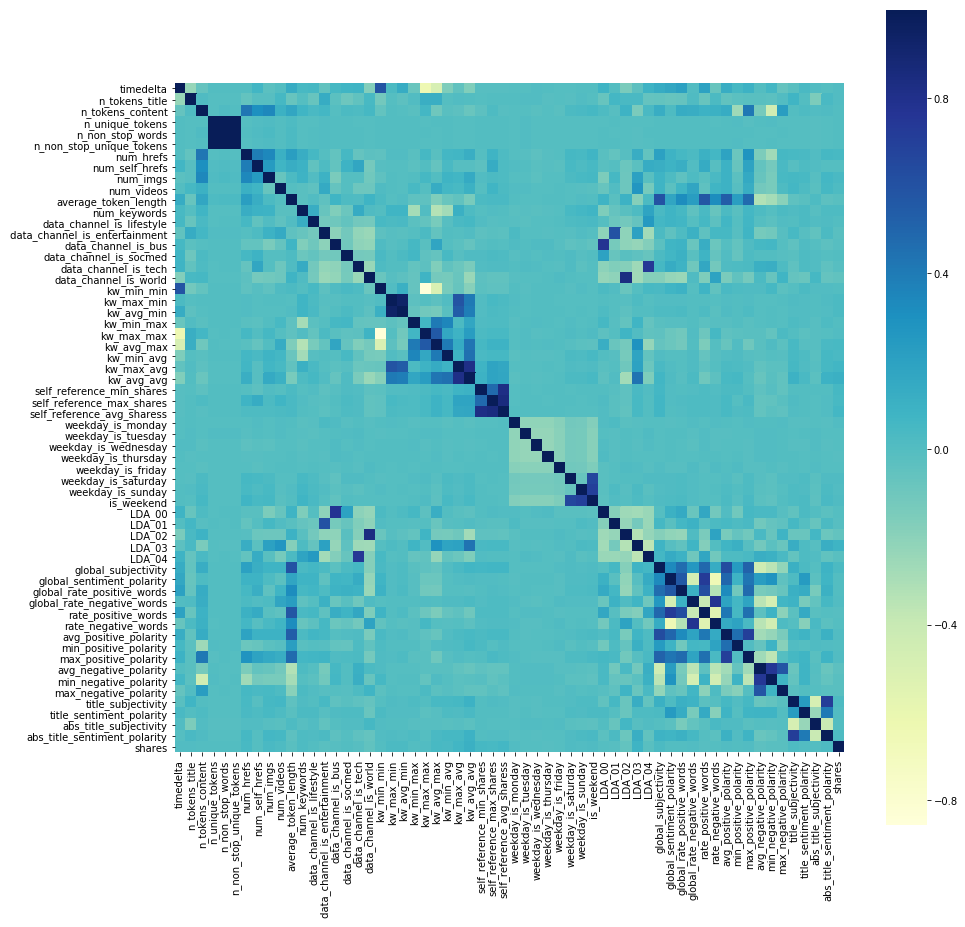

In [28]:
#Co-relation matrix
plt.figure(figsize=(15,15))
corelation = social_media_data.corr()
sn.heatmap(corelation,cmap='YlGnBu',square=True)

In [29]:
# Data set visulization for 5 rows after dropping rows
social_media_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [30]:
# Drop Na value from the all columns
social_media_data.dropna()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [31]:
x=social_media_data.iloc[:,0:59] # X value is containing all value except target 
y=social_media_data.shares  # Y is containing the target values

<b>LinearRegration Without PCA .</b>

In [32]:
# Splitting the dataset 80% as training and 20% as testing data.
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=0) 

In [33]:
# As the data set is containing continuous data so We have to use Linear Regration model.
linear_model = LinearRegression()
# Fitting data into model
linear_model.fit(train_x,train_y)
# Making prediction based on test_x data.
y_pred = linear_model.predict(test_x)
print('Predicted Values ::: ',y_pred)

Predicted Values :::  [1955.98546352 1927.15655902 3375.37570128 ... 5719.6890591  1266.39121513
 3053.31526155]


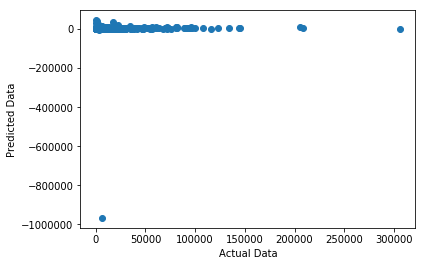

In [34]:
# Data visualization based on Actual and Predicted data.
plt.scatter(test_y,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [41]:
# RMSE Value of model , which is very high , that means model is not good at all right. To make a good model we have to use PCA.
print(np.sqrt(metrics.mean_absolute_error(y_pred,test_y)))

56.18412865512486


<font color='red'><b>LinearRegration After PCA .</b>

In [42]:
data_for_pca=social_media_data.iloc[:,0:59]
y=social_media_data.shares

In [43]:
data_for_pca.index.names=['No.']
data_for_pca.columns.names=['Type']
data_for_pca.fillna(15)
data_for_pca.head(5)

Type,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
No.,,,,,,,,,,,,,,,,,,,,,
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [44]:
# PCA with n components
pca = PCA(n_components=2)
pca.fit(data_for_pca)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
# 
print(pca.explained_variance_ratio_.round(2))

[0.76 0.16]


In [46]:
df_2d = pca.transform(data_for_pca)
df_2d_df1 = pd.DataFrame(df_2d)
df_2d_df1.index = data_for_pca.index
# We are taking 2 "PC1 and PC2" value as we are not getting higher value for others. 
df_2d_df1.columns=['PC1','PC2']
df_2d_df1.head(5)

,PC1,PC2
No.,,
0,791448.520136,84416.867661
1,791459.110470,84389.351324
2,791439.508650,84440.263211
3,791459.096185,84389.161689
4,791257.144238,84934.219442


In [47]:
# Adding Share values in dataset
df_2d_df1['share']=y

In [48]:
df_2d_df1.head(5)

,PC1,PC2,share
No.,,,
0,791448.520136,84416.867661,593
1,791459.110470,84389.351324,711
2,791439.508650,84440.263211,1500
3,791459.096185,84389.161689,1200
4,791257.144238,84934.219442,505


In [49]:
X1=df_2d_df1.iloc[:,0:4]
Y1=df_2d_df1.share

In [50]:
train_x,test_x,train_y,test_y=train_test_split(X1,Y1,test_size=.20,random_state=0)

In [51]:
#corelation = df_2d_df1.corr()
#sn.heatmap(corelation,cmap='YlGnBu',square=True)

In [52]:
linear_model = LinearRegression()
linear_model.fit(train_x,train_y)
y_pred = linear_model.predict(test_x)

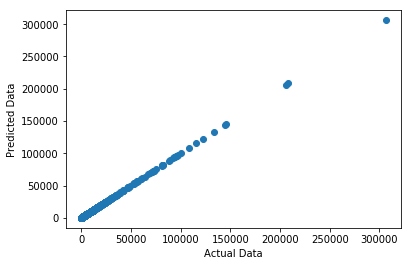

In [53]:
# Data Visualization is very good.
plt.scatter(test_y,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [54]:
# RMSE Value is very less that means the model is very good.
print(np.sqrt(metrics.mean_absolute_error(y_pred,test_y)).round(7))

3.5e-06


In [55]:
# R2 value 
print(metrics.r2_score(test_y,y_pred))

1.0
